In [1]:
import matplotlib.pyplot as plt 
import cv2 
import imutils
from os import listdir
import os
%matplotlib inline

import sys
# sys.executable
import pandas as pd
import keras as K
from  keras.applications.inception_v3 import InceptionV3

Using TensorFlow backend.


In [75]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K

# set the matplotlib backend so figures can be saved in the background
import matplotlib
# matplotlib.use("Agg")
 
# import the necessary packages
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
# from pyimagesearch.smallervggnet import SmallerVGGNet
import matplotlib.pyplot as plt
from imutils import paths
import numpy as np
import argparse
import random
import pickle
import cv2
import os
import pandas as pd

import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam

In [68]:
train_img_path='../dataset/Train Images/'
test_img_path='../dataset/Test Images/'
Train_csv_path='../dataset/train.csv'
Test_csv_path='../dataset/test.csv'
image_dims=[100,100,3]
batch_size=16
epochs=10

In [85]:
data=pd.read_csv(Train_csv_path)
data.head(2)

,Image,Class
0,image7042.jpg,Food
1,image3327.jpg,misc


In [34]:
dummy_cols=pd.Series(data['Class'].unique())
label_dict=pd.get_dummies(dummy_cols).astype(int)
label_dict

,Attire,Decorationandsignage,Food,misc
0,0,0,1,0
1,0,0,0,1
2,1,0,0,0
3,0,1,0,0


In [5]:
imgs=[]
for i,file in enumerate(listdir(train_img_path)):
#     print(file)
    img=cv2.imread(train_img_path+file)
    print(img.shape)
    imgs.append(img)
    if i ==10:
        break     

(60, 80, 3)
(53, 80, 3)
(107, 80, 3)
(65, 80, 3)
(58, 80, 3)
(45, 80, 3)
(53, 80, 3)
(53, 80, 3)
(51, 80, 3)
(128, 80, 3)
(53, 80, 3)


In [44]:
# im.shape

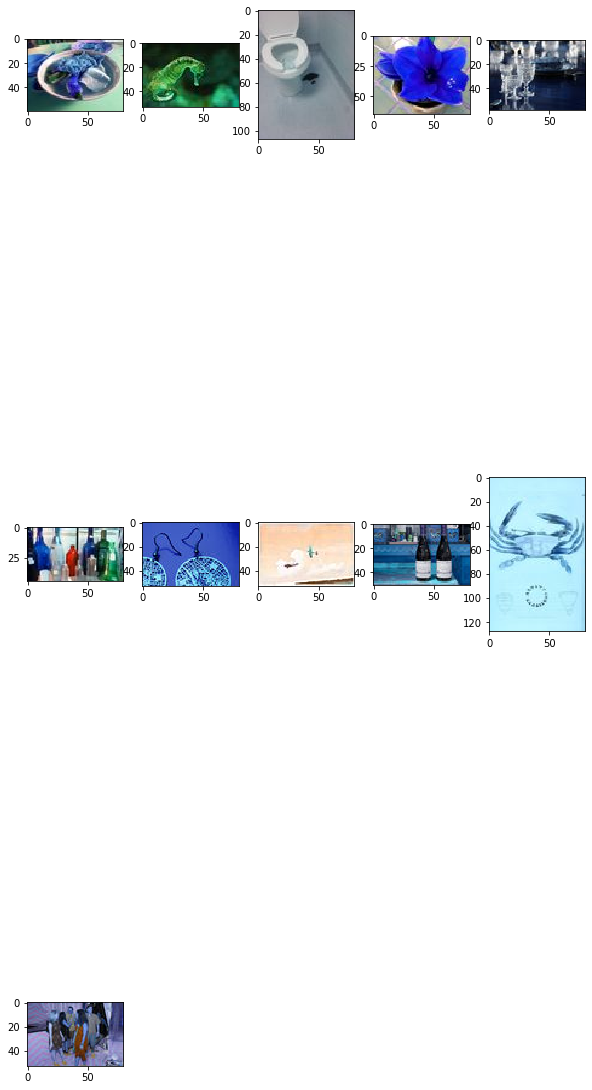

In [45]:
plt.figure(figsize=(10,25))
col=5
for i,img in enumerate(imgs):
    plt.subplot(len(imgs)/col+1,col,i+1)
    plt.imshow(img)

In [57]:
base_model=InceptionV3(include_top=False,weights='imagenet')
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #dense layer 1
x=Dense(512,activation='relu')(x) #dense layer 2
preds=Dense(4,activation='softmax')(x) #dense layer 3

In [58]:
model=Model(input=base_model.input,outputs=preds)

C:\anaconda\envs\vision\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  """Entry point for launching an IPython kernel.


In [59]:
for i in model.layers[:-3]:
    i.trainable=False

In [92]:
def generate_image(batch_size=16,train=True, path=Train_csv_path, img_path=train_img_path, label_dict=label_dict):
    image_paths=sorted(list(listdir(train_img_path)))
    random.seed(10)
    random.shuffle(image_paths)
    train_paths=image_paths[:4500]
    test_paths=image_paths[4500:]
    data=pd.read_csv(path)
    if train==False:
        image_paths=test_paths
    csv_data=dict(zip(data['Image'].values,data['Class'].values))
    index=0
    while index*batch_size<len(image_paths):
        batch_x=[]
        batch_y=[]
        batch_imgs=image_paths[(index)*batch_size:(index+1)*batch_size]
        for i in batch_imgs:
            temp_img=cv2.imread(train_img_path+i)
            temp_img=cv2.resize(temp_img,(image_dims[0],image_dims[1]))
            batch_x.append(img_to_array(temp_img))
            batch_y.append(label_dict[csv_data[i]])
        x=np.array(batch_x, dtype='float')/255
        y=np.array(batch_y)
        index+=1
        yield(x,y)
        
        
    

In [61]:
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [93]:
def train(BS=batch_size,EPOCHS=epochs):# initialize the number of epochs to train for, initial learning rate,
    print("[INFO] training network...")
    H = model.fit_generator(generator=generate_image(),
        validation_data=generate_image(train=False),
        validation_steps=1000//BS,
        steps_per_epoch=4500// BS,
        epochs=EPOCHS, verbose=1)
    
    # save the model to disk
    try:
        print("[INFO] serializing network...")
        model.save('./model10.model')
    except:
        pass
    return model,H

In [94]:
train()

[INFO] training network...
Epoch 1/10
281/281 [==============================] - 112s 399ms/step - loss: 0.8245 - accuracy: 0.6695 - val_loss: 2.0157 - val_accuracy: 0.4899
Epoch 2/10
 93/281 [========>.....................] - ETA: 1:02 - loss: 0.7816 - accuracy: 0.6819

StopIteration: 

1

In [71]:
data.shape

(5983, 2)

In [78]:
data.shape

(5983, 2)

In [79]:
len(listdir(train_img_path))
    

5983

In [80]:
type(data.to_dict())

dict

In [81]:
for i in data.to_dict():
    print(i)

Image
Class
